In [1]:
# imports
import lxml.html as lh
import pandas as pd
from bs4 import BeautifulSoup
import json
import requests
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
''' TODO actually make this into a list'''
url = 'http://ultrasignup.com/service/events.svc/results/51691/json?_search=false'
# grab the data
page = requests.get(url)
soup = BeautifulSoup(page.text, 'lxml')
results = page.json()

# create df from JSON
df = pd.DataFrame.from_records(results)

In [3]:
irrelevant = ['age_rank','photo_count','prior_count','race_count', 'drilldown','time', 'status'] # do not need these 
for col in df.columns:
    if col in irrelevant:
        del df[col]
df.head()

,age,agegroup,bib,city,firstname,formattime,gender,gender_place,lastname,participant_id,place,runner_rank,state
0,34,30-39,98,Richland,Jesse,18:03:00,M,1,Lang,240580,1,90.20,WA
1,36,30-39,26,Spokane,Brandon,19:05:48,M,2,Benefield,917459,2,92.77,WA
2,38,30-39,74,San Diego,Lindsay,19:49:31,M,3,Hamoudi,336440,3,84.33,CA
3,33,30-39,30,Issaquah,Bryan,21:54:27,M,4,Bhark,672855,4,94.01,WA
4,32,30-39,170,Kirkland,Phil,21:55:56,M,5,Shaw,2034,5,91.41,WA


In [4]:
# lists to create various dataframe
states = []
ages = []
num_part = []

# create empty dataframes
age_df = pd.DataFrame(columns=['state', 'avg_age'])
part_df = pd.DataFrame(columns=['state', 'participants'])

# iterate through each state
for state in df.state.unique():
    # find the average age and number of participants
    sum_age = df.loc[df['state'] == state, 'age'].sum()
    num_part.append(df['state'].value_counts()[state])
    avg_age = "{0:.2f}".format(sum_age / len(df[df['state'] == state]))
    states.append(state)
    ages.append(float(avg_age))

# populate the dataframes
age_df['state'] = states
age_df['avg_age'] = ages
part_df['state'] = states
part_df['participants'] = num_part
age_df.head()

,state,avg_age
0,WA,42.08
1,CA,38.47
2,OR,40.67
3,ID,38.00
4,MT,43.75


In [5]:
part_df.head() 

,state,participants
0,WA,60
1,CA,19
2,OR,12
3,ID,2
4,MT,4


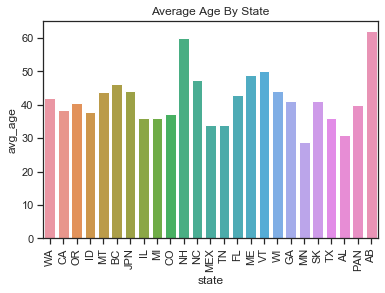

In [6]:
import seaborn as sns # visualize avg age
sns.set(style="ticks", color_codes=True)

plt.xticks(rotation=90) # due this to avoid crowding
plt.title('Average Age By State')
sns.barplot(x='state', y='avg_age',data=age_df)



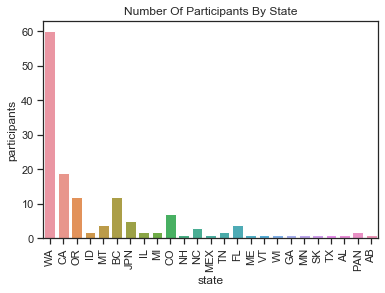

In [7]:
plt.xticks(rotation=90)
plt.title('Number Of Participants By State')
sns.barplot(x='state', y='participants',data=part_df)